In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

[[-0.99833053 -1.10532336]
 [-0.47526844  1.40340655]
 [ 0.45336139 -1.42391321]
 [-0.00186877 -0.01434229]
 [ 0.9651807   1.09245937]
 [ 1.43969059 -0.31152157]
 [-1.42866298  0.29426337]]


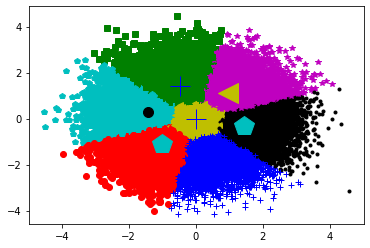

In [2]:
qm = np.load('test.npy')
pca = PCA(n_components=2)
# pca.fit(qm)
# print(pca.singular_values_)
# print(pca.explained_variance_ratio_)
pca_qm = pca.fit_transform(qm)
k = 7
clf1 = KMeans(n_clusters=k, random_state=0).fit(pca_qm)
label = clf1.labels_
cents = clf1.cluster_centers_
print(cents)
x, y = pca_qm[:,0], pca_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

[[ 2.4149158  -1.4995755 ]
 [-0.3126412  -2.949011  ]
 [-2.5168047   1.9822993 ]
 [-3.135805   -1.1036038 ]
 [-0.07919635  0.21965033]
 [ 2.8528056   1.6077943 ]
 [ 0.21084663  3.8174653 ]]


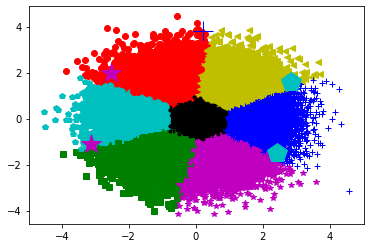

In [17]:
qm = np.load('test.npy')
# pca = PCA(n_components=2)
# pca.fit(qm)
# print(pca.singular_values_)
# print(pca.explained_variance_ratio_)
# pca_qm = pca.fit_transform(qm)
from sklearn.mixture import GaussianMixture
k = 7
clf_gm = GaussianMixture(n_components=k, random_state=0).fit(pca_qm)
label = clf_gm.predict(pca_qm)
# cents = clf_gm.cluster_centers_
x, y = pca_qm[:,0], pca_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

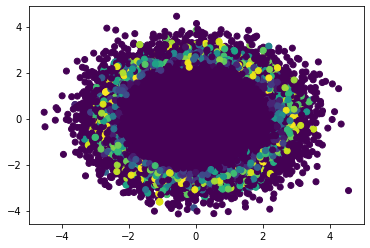

In [146]:
from  sklearn.cluster import DBSCAN

count = -1
clf_db = DBSCAN(eps=0.03,min_samples=2).fit_predict(pca_qm[:count])
# label = clf_gm.predict(pca_qm)
# cents = clf_gm.cluster_centers_
x, y = pca_qm[:count,0], pca_qm[:count,1]
plt.scatter(x,y, c=clf_db)
plt.show()
# color = ['or','sg','+b','<y','*m', '.k', 'pc']
# for i in range(len(x)):
#     plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):

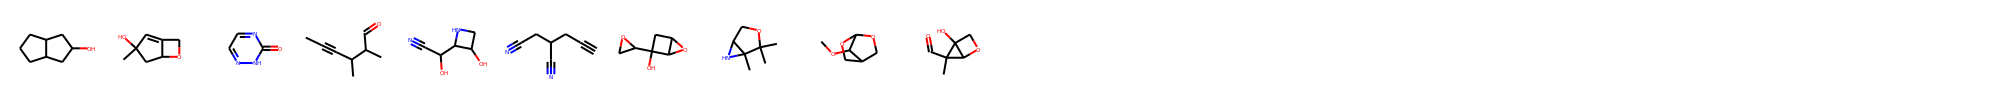

In [14]:
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
import pandas as pd

qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

cents = np.array([[-0.99833053, -1.10532336],
 [-0.47526844, 1.40340655],
 [ 0.45336139,-1.42391321],
 [-0.00186877,-0.01434229],
 [ 0.9651807 , 1.09245937],
 [ 1.43969059,-0.31152157],
 [-1.42866298, 0.29426337]])

x,y = cents[6]
m,n = cents[5]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-0.5, 0.5, 10)
X = (B*Y+C)/(-A)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(pca_qm[:,0]-a)+abs(pca_qm[:,1]-b))
#     print(c)
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

# for cent in cents:
#     a,b = cent
#     c = np.where((abs(pca_qm[:,0]-a)<0.02) & (abs(pca_qm[:,1]-b)<0.02))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

# df = pd.DataFrame(label,columns=['label']) 

# for i in set(label):
#     a = df[df['label']==i].index.tolist()
#     a = [Chem.MolFromSmiles(data[i]) for i in a[-100:]]
#     display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
#     print('*****************************************************************************')

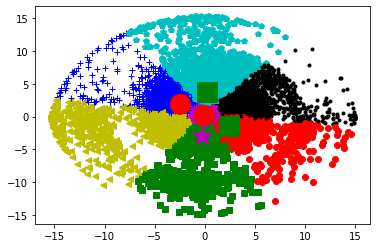

In [3]:
from sklearn.manifold import TSNE

qm = np.load('test.npy')
tsne_qm = TSNE(n_components=2).fit_transform(qm)
k = 7
clf2 = KMeans(n_clusters=k, random_state=0).fit(tsne_qm)
label = clf2.labels_
cents = clf2.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

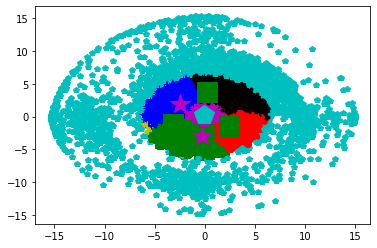

In [18]:
qm = np.load('test.npy')
# pca = PCA(n_components=2)
# pca.fit(qm)
# print(pca.singular_values_)
# print(pca.explained_variance_ratio_)
# pca_qm = pca.fit_transform(qm)
from sklearn.mixture import GaussianMixture
k = 7
clf_gmtsne = GaussianMixture(n_components=k, random_state=0).fit(tsne_qm)
label = clf_gmtsne.predict(tsne_qm)
# cents = clf_gm.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):
#     plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

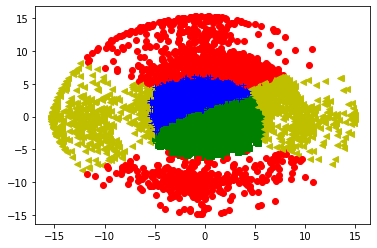

In [140]:
clf_gmtsne1 = GaussianMixture(n_components=4, random_state=0).fit(tsne_qm)
label = clf_gmtsne1.predict(tsne_qm)
# cents = clf_gm.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
plt.savefig('comp02.png')

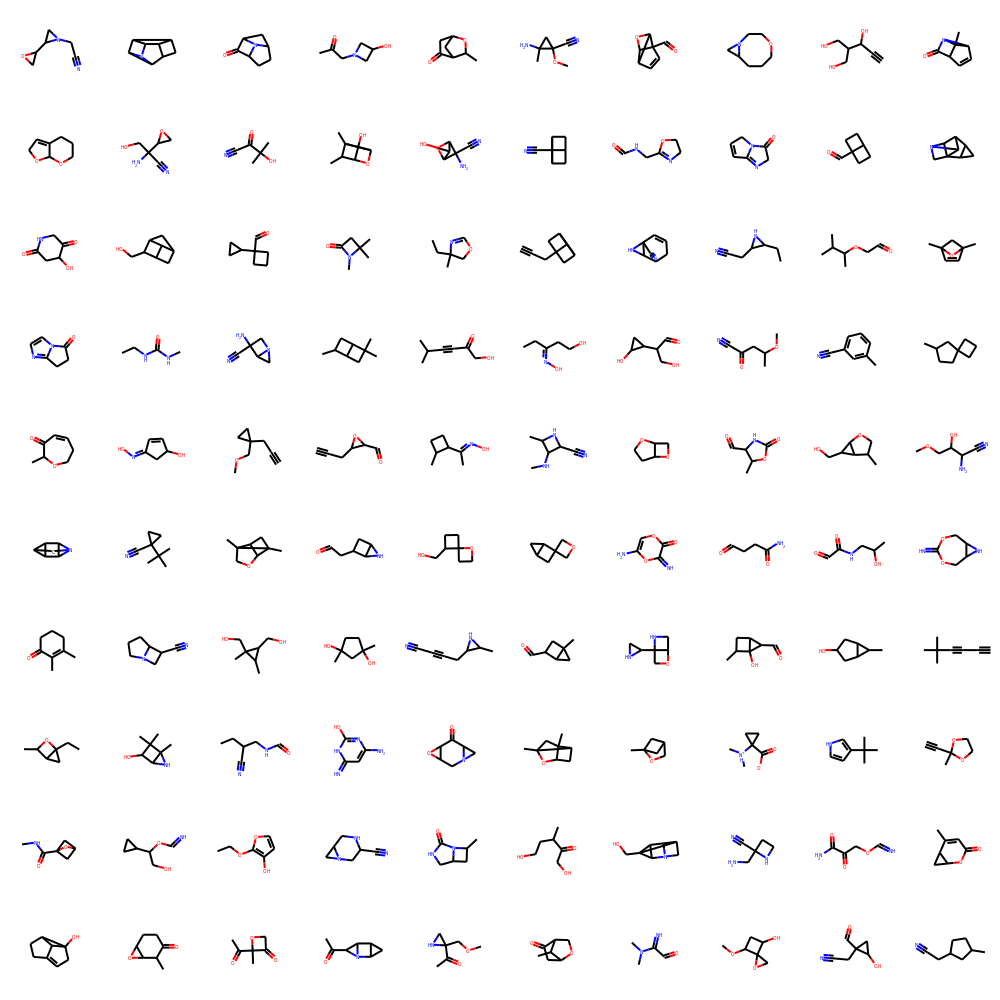

In [163]:
from rdkit.Chem.Descriptors import qed #, MolLogP
from rdkit.Chem import rdMolDescriptors
mols = []
lb = []
label = clf_gmtsne1.predict(tsne_qm)
step = 10
end = 10.0

X = np.linspace(-end, end, step)
Y = np.linspace(-end, end, step)
for i in X:
    mol_col = []
    for j in Y:
        c = np.argmin(abs(tsne_qm[:,0]-i)+abs(tsne_qm[:,1]-j))
        mol_col.append(c)
    mols.extend([Chem.MolFromSmiles(data[k]) for k in mol_col])
#     lb.append(mol_col)



# legends = []
# for k, mol in enumerate(mols):
#     qeds = [str(round(qed(i),2)) for i in mol]
#     plogp = [str(round(Chem.Descriptors.MolLogP(i),2))for i in mol]
# #     legend = [qeds[i] + '&' + plogp[i] for i in range(len(qeds))]
#     lbk = [str(label[i]) for i in lb[k]]
#     legend = [qeds[i] + '&' + lbk[i] for i in range(len(qeds))]
#     print(legend)


# qed = [str(round(qed(i),2)) for i in mol]
# plogp = [str(round(Chem.Descriptors.MolLogP(i),2))for i in mol]
# legend = [qed[i] + '&' + plogp[i] for i in range(len(qed))]
    
img = Draw.MolsToGridImage(mols, molsPerRow=step, maxMols=10000, subImgSize=(100, 100))    
display(img)
img.save('comp00.png')

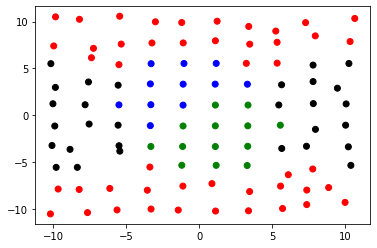

In [164]:
mol = []
step = 10
end = 10.0
X = np.linspace(-end, end, step)
Y = np.linspace(-end, end, step)
label = clf_gmtsne1.predict(tsne_qm)

for i in X:
    mol_col = []
    for j in Y:
        c = np.argmin(abs(tsne_qm[:,0]-i)+abs(tsne_qm[:,1]-j))
        mol_col.append(c)
    mol.extend(mol_col)
    
# cents = clf_gm.cluster_centers_
x = np.array([tsne_qm[i,0] for i in mol])
y = np.array([tsne_qm[i,1] for i in mol])
cc = ['r','g','b','k']
c = [cc[label[i]] for i in mol]
plt.scatter(x,y,c=c)
plt.savefig('comp01.png')
plt.show()

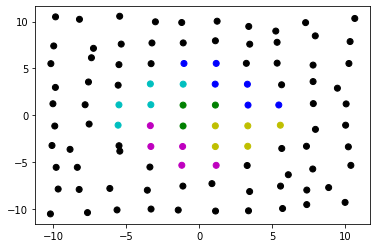

In [166]:
mol = []
step = 10
end = 10.0
X = np.linspace(-end, end, step)
Y = np.linspace(-end, end, step)
label = clf_gmtsne.predict(tsne_qm)

for i in X:
    mol_col = []
    for j in Y:
        c = np.argmin(abs(tsne_qm[:,0]-i)+abs(tsne_qm[:,1]-j))
        mol_col.append(c)
    mol.extend(mol_col)
    
# cents = clf_gm.cluster_centers_
x = np.array([tsne_qm[i,0] for i in mol])
y = np.array([tsne_qm[i,1] for i in mol])
cc = ['y','m','c','r','g','b','k']
c = [cc[label[i]] for i in mol]
plt.scatter(x,y,c=c)
plt.savefig('comp11.png')
plt.show()

0


/home/mac0c/anaconda3/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


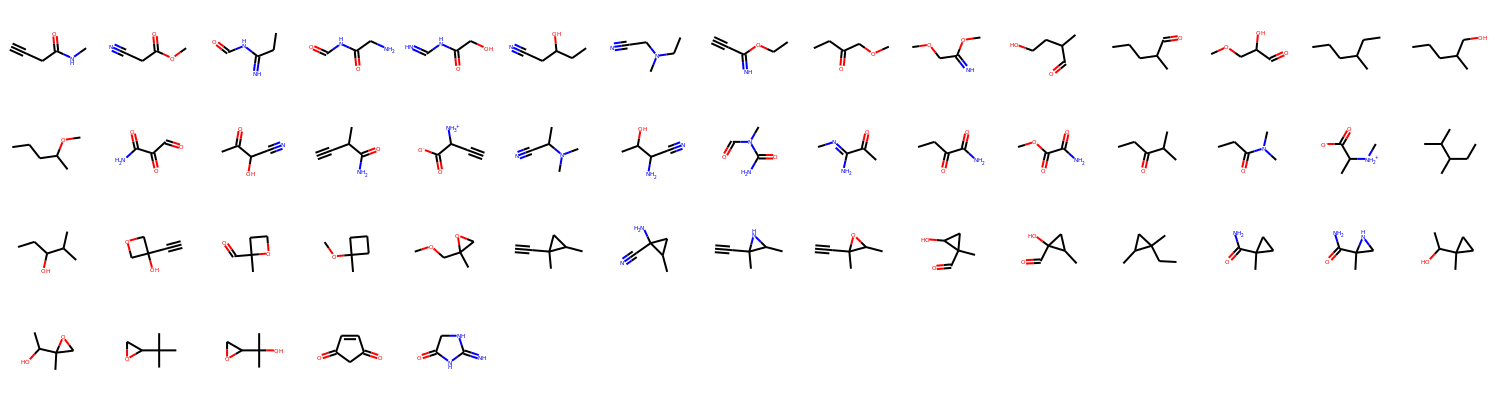

*****************************************************************************
1


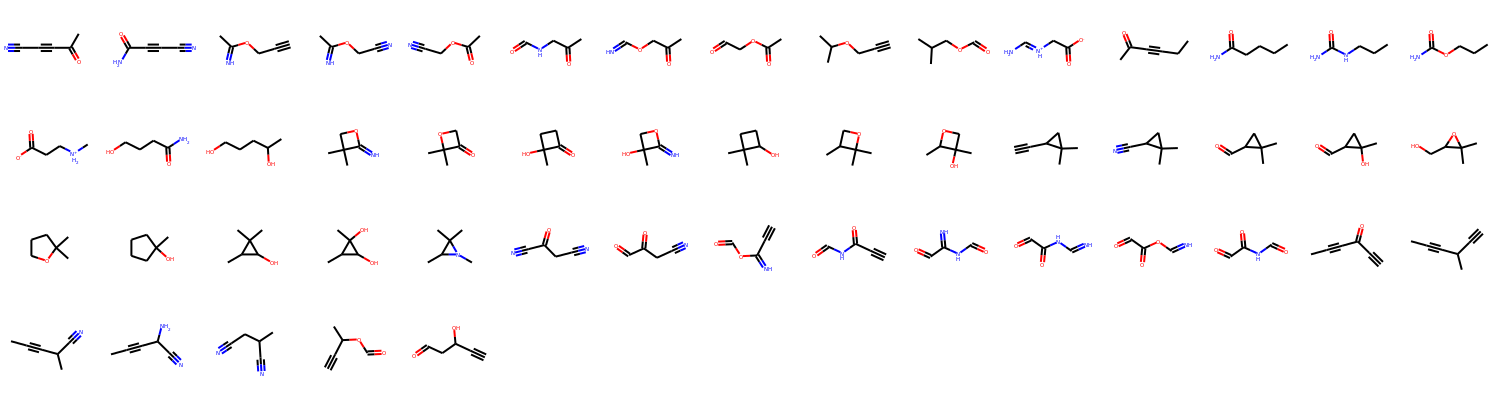

*****************************************************************************
2


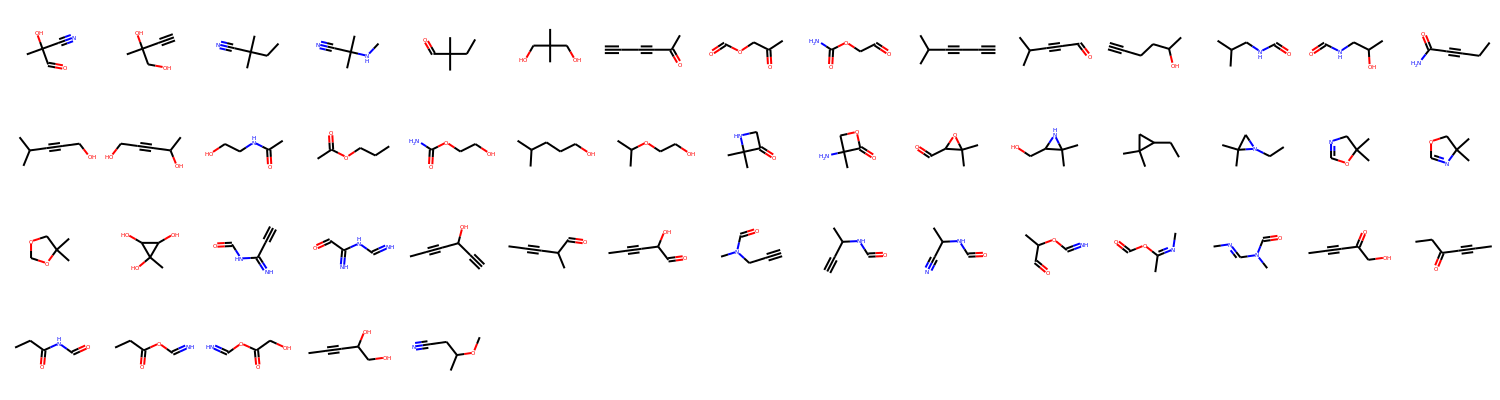

*****************************************************************************
3


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1475387200b0>

In [85]:
label = clf_gmtsne.predict(tsne_qm)
df = pd.DataFrame(label,columns=['label'])
for i in set(label):
    a = df[df['label']==i].index.tolist()
    a = [Chem.MolFromSmiles(data[i]) for i in a[200:300]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')

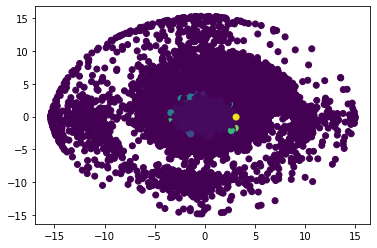

In [46]:
from  sklearn.cluster import DBSCAN

clf_db = DBSCAN(eps=0.1,min_samples=50).fit_predict(tsne_qm)
# label = clf_gm.predict(pca_qm)
# cents = clf_gm.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
plt.scatter(x,y, c=clf_db)
plt.show()
# color = ['or','sg','+b','<y','*m', '.k', 'pc']
# for i in range(len(x)):
#     plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):

[[ 2.4149158  -1.4995755 ]
 [-0.3126412  -2.949011  ]
 [-2.5168047   1.9822993 ]
 [-3.135805   -1.1036038 ]
 [-0.07919635  0.21965033]
 [ 2.8528056   1.6077943 ]
 [ 0.21084663  3.8174653 ]]


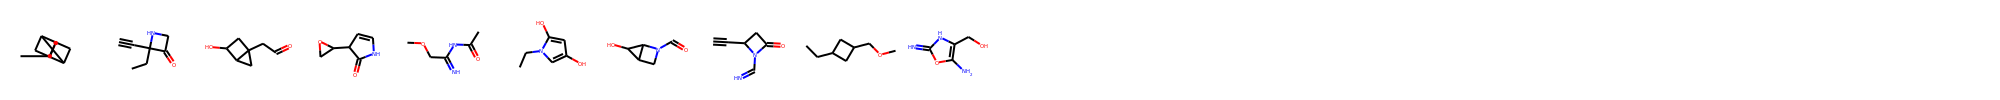

In [16]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

cents = clf2.cluster_centers_
print(cents)

x,y = cents[0]
m,n = cents[5]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

# label = clf2.labels_
# cents = clf2.cluster_centers_

# for cent in cents:
#     a,b = cent
#     c = np.where((abs(tsne_qm[:,0]-a)<0.1) & (abs(tsne_qm[:,1]-b)<0.1))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

# for i in set(label):
#     a = df[df['label']==i].index.tolist()
#     a = [Chem.MolFromSmiles(data[i]) for i in a[-100:]]
#     display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
#     print('*****************************************************************************')

In [ ]:
# from sklearn.manifold import TSNE

# qm = np.load('test.npy')
# tsne_qm = TSNE(n_components=2).fit_transform(qm)
k = 7
clf9 = KMeans(n_clusters=k, random_state=0).fit(tsne_qm)
label = clf9.labels_
cents = clf9.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

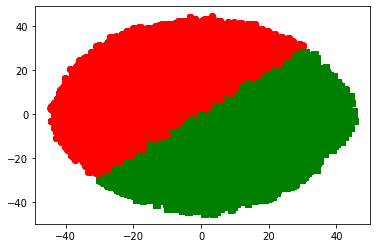

In [34]:
k = 2
clf3 = KMeans(n_clusters=k, random_state=0).fit(tsne_qm)
label = clf3.labels_
cents = clf3.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

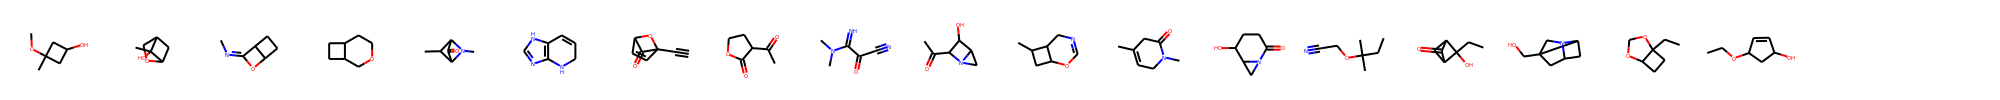

*****************************************************************************


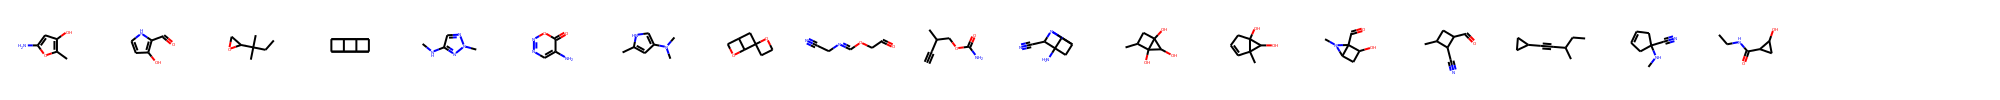

*****************************************************************************


In [38]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

df = pd.DataFrame(label,columns=['label']) 
from IPython.display import Image

for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

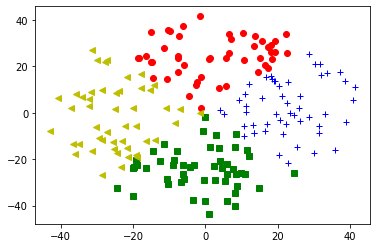

In [107]:
k = 2
# clf4 = KMeans(n_clusters=k, random_state=1).fit(tsne_qm)
label = clf4.labels_
cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(200):
    plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):
#     plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

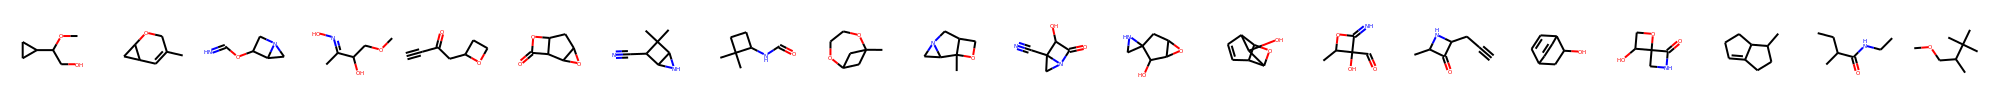

*****************************************************************************


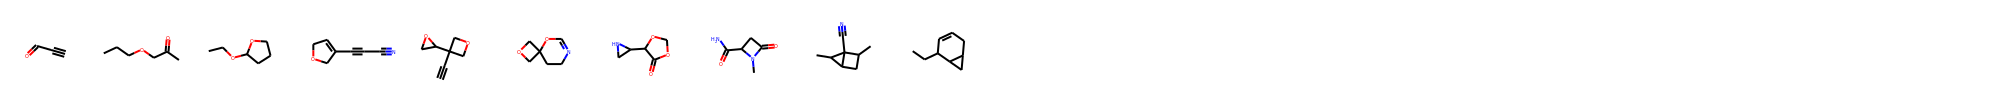

*****************************************************************************


In [11]:
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
import pandas as pd

qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.4) & (abs(tsne_qm[:,1]-b)<0.4))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

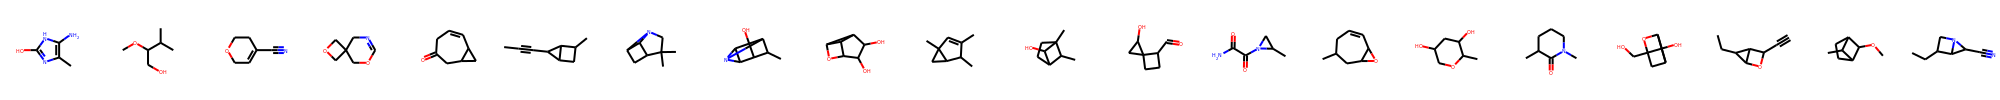

*****************************************************************************


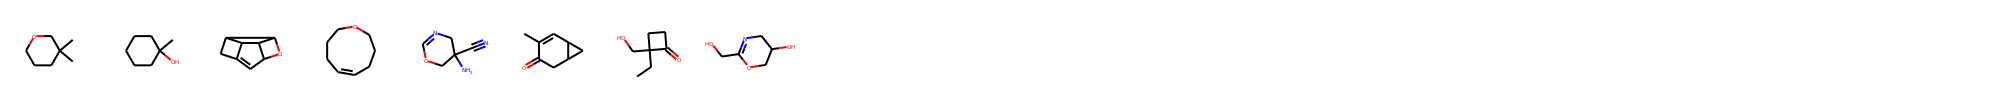

*****************************************************************************


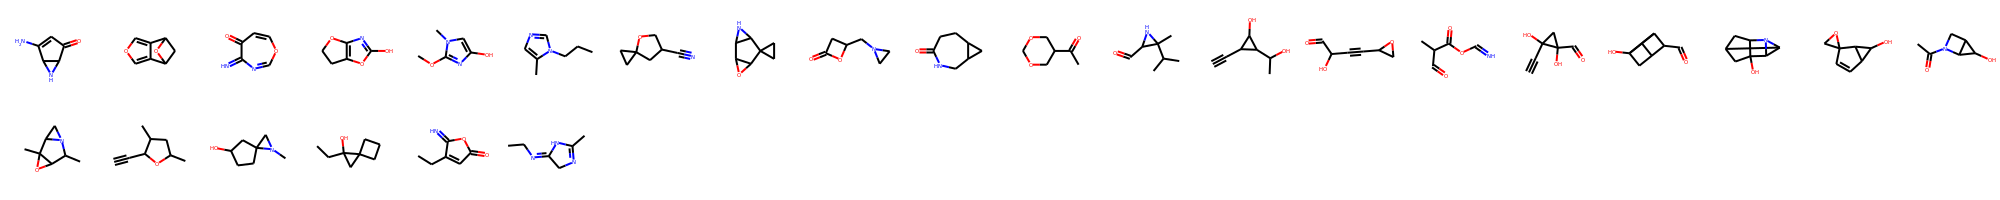

*****************************************************************************


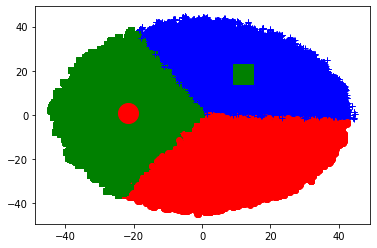

In [12]:
k = 3
clf4 = KMeans(n_clusters=k, random_state=2).fit(tsne_qm)
label = clf4.labels_
cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)
    
for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.4) & (abs(tsne_qm[:,1]-b)<0.4))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

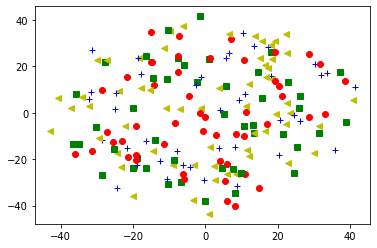

In [106]:
k = 4
# clf4 = KMeans(n_clusters=k, random_state=5).fit(tsne_qm)
# label = clf4.labels_
# cents = clf4.cluster_centers_
x, y = tsne_qm[:,0], tsne_qm[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(200):
    plt.plot(x[i],y[i],color[label[i]])
# for i in range(k):
#     plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)
    
# for cent in cents:
#     a,b = cent
#     c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
#     mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
#     display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
#     print('*****************************************************************************')

In [128]:
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])

cents = np.array([[ -0.29179397,  23.860298  ],
       [  0.6294266 , -24.21649   ],
       [ 23.624022  ,   0.7037133 ],
       [-23.391617  ,  -0.5453895 ]])
cents

array([[ -0.29179397,  23.860298  ],
       [  0.6294266 , -24.21649   ],
       [ 23.624022  ,   0.7037133 ],
       [-23.391617  ,  -0.5453895 ]])

[-40.50294135 -32.13860194 -23.77426253 -15.40992312  -7.04558371
   1.31875571   9.68309512  18.04743453  26.41177394  34.77611335]


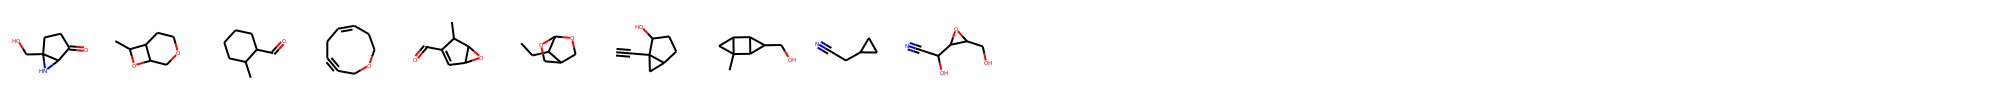

In [137]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

[-40.50294135 -32.13860194 -23.77426253 -15.40992312  -7.04558371
   1.31875571   9.68309512  18.04743453  26.41177394  34.77611335]


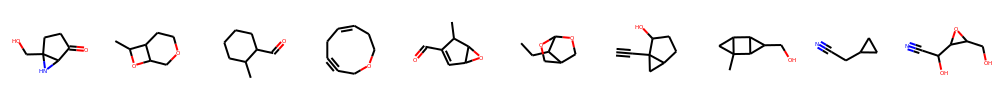

In [139]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
img = Draw.MolsToGridImage(mol,molsPerRow=10, subImgSize=(100, 100))
display(img)
img.save('trend.png')

[-23.82190285 -21.19275442 -18.56360599 -15.93445755 -13.30530912
 -10.67616068  -8.04701225  -5.41786381  -2.78871538  -0.15956694]


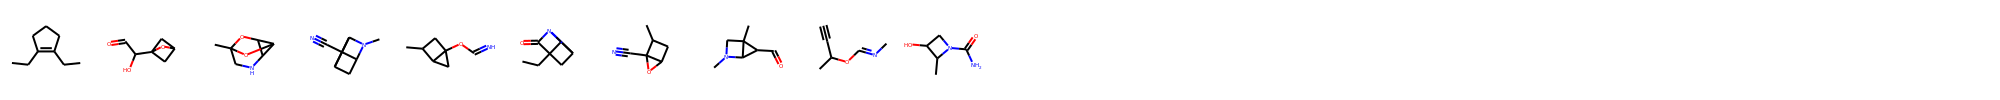

In [91]:
x,y = cents[3]
m,n = cents[0]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-1, 24, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

[-0.09354083  2.57212085  5.23778254  7.90344423 10.56910591 13.2347676
 15.90042928 18.56609097 21.23175266 23.89741434]


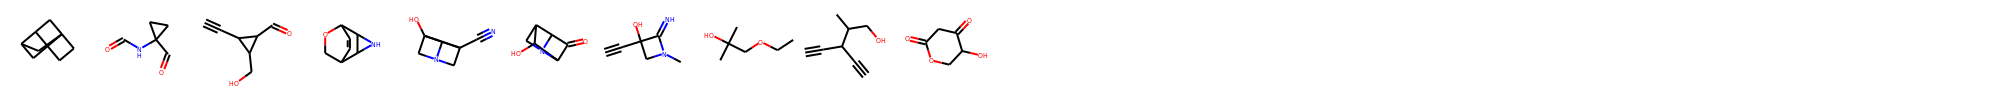

In [92]:
x,y = cents[1]
m,n = cents[2]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-25, 1, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_qm[:,0]-a)+abs(tsne_qm[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))

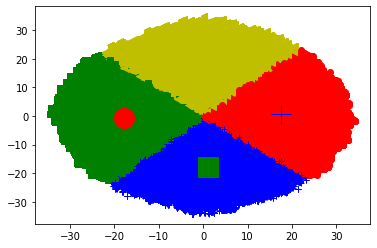

In [44]:
from sklearn.manifold import TSNE

zinc = np.load('zinc_test.npy')
tsne_zinc = TSNE(n_components=2).fit_transform(zinc)
k = 4
clf11 = KMeans(n_clusters=k, random_state=0).fit(tsne_zinc)
label = clf11.labels_
cents = clf11.cluster_centers_
x, y = tsne_zinc[:,0], tsne_zinc[:,1]
color = ['or','sg','+b','<y','*m', '.k', 'pc']
for i in range(len(x)):
    plt.plot(x[i],y[i],color[label[i]])
for i in range(k):
    plt.plot(cents[i,0],cents[i,1], color[label[i]], markersize=20)

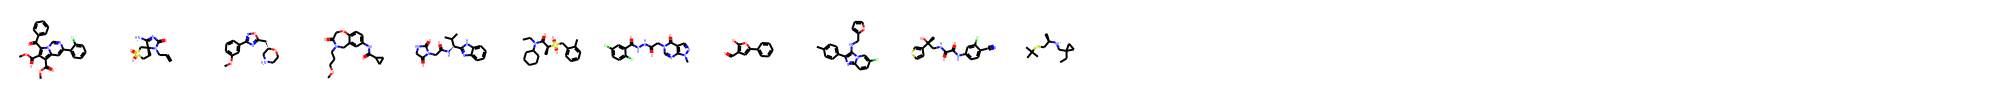

*****************************************************************************


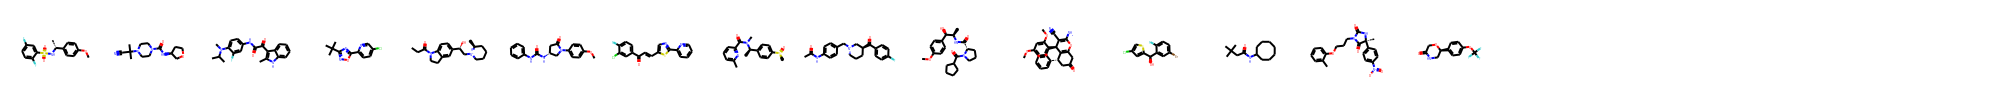

*****************************************************************************


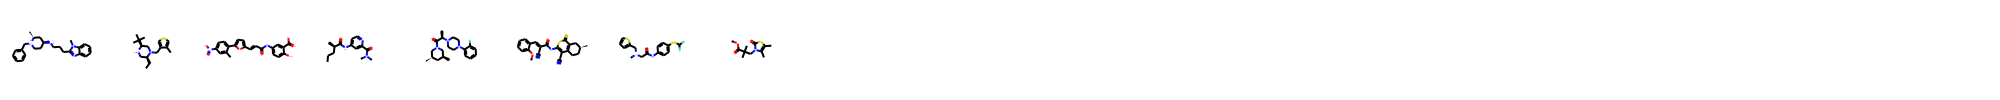

*****************************************************************************


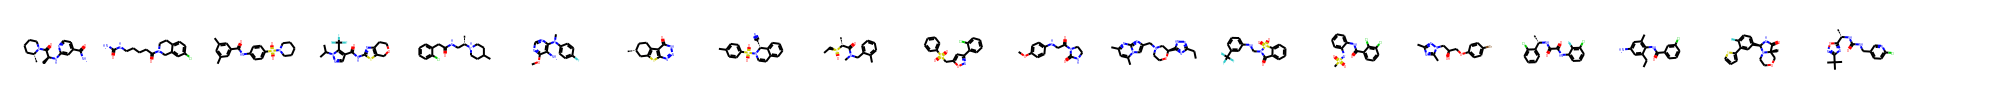

*****************************************************************************


In [47]:
zinc = pd.read_csv('../data/zinc250k.csv')
data = list(zinc['smiles'])

for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_zinc[:,0]-a)<0.2) & (abs(tsne_zinc[:,1]-b)<0.2))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [96]:
zinc = pd.read_csv('../data/zinc250k.csv')
data = list(zinc['smiles'])

cents = np.array([[ 17.507889  ,   0.8127308 ],
       [-17.764507  ,  -0.5725578 ],
       [  0.9823816 , -17.85371   ],
       [ -0.65922827,  17.945826  ]])
cents

array([[ 17.507889  ,   0.8127308 ],
       [-17.764507  ,  -0.5725578 ],
       [  0.9823816 , -17.85371   ],
       [ -0.65922827,  17.945826  ]])

[ 0.98908982  0.80566734  0.62224487  0.43882239  0.25539992  0.07197745
 -0.11144503 -0.2948675  -0.47828998 -0.66171245]


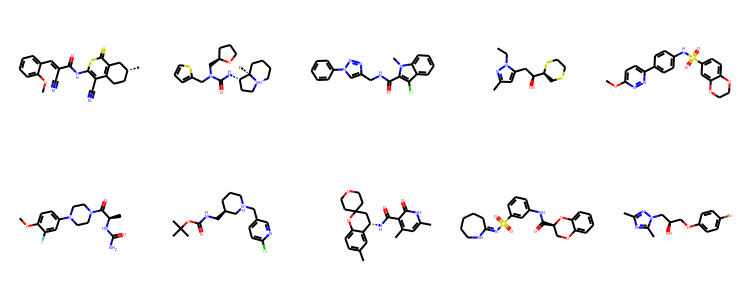

In [97]:
x,y = cents[2]
m,n = cents[3]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-18, 18, 10)
X = (B*Y+C)/(-A)
print(X)
mol = []
import math
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_zinc[:,0]-a)+abs(tsne_zinc[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=5, subImgSize=(150, 150)))

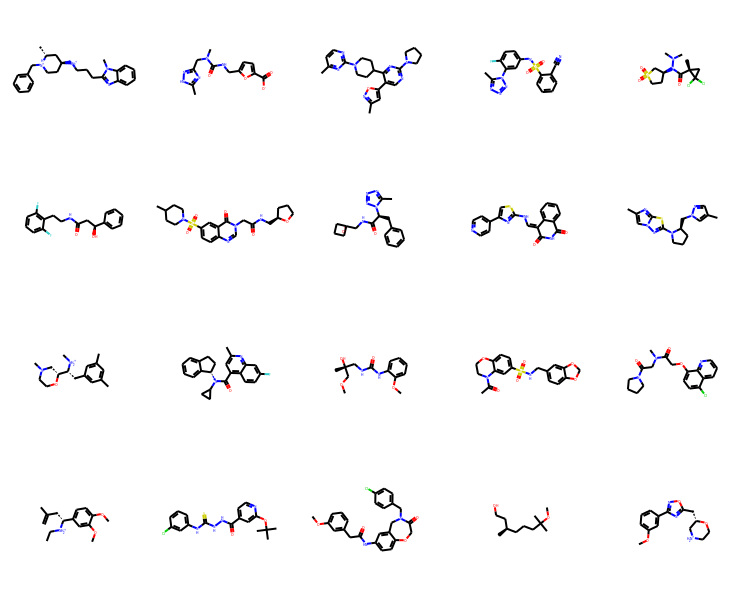

In [100]:
x,y = cents[0]
m,n = cents[2]
A = n-y
B = x-m
C = m*y-x*n
Y = np.linspace(-18, 1, 20)
X = (B*Y+C)/(-A)
mol = []
import math
for i in range(len(X)):
    a,b = X[i], Y[i]
    c = np.argmin(abs(tsne_zinc[:,0]-a)+abs(tsne_zinc[:,1]-b))
    mol.append(c)
mol = [Chem.MolFromSmiles(data[i]) for i in mol]
display(Draw.MolsToGridImage(mol,molsPerRow=5, subImgSize=(150, 150)))

In [ ]:
for cent in cents:
    a,b = cent
    c = np.where((abs(tsne_qm[:,0]-a)<0.5) & (abs(tsne_qm[:,1]-b)<0.5))
    mol = [Chem.MolFromSmiles(data[i]) for i in c[0]]
    display(Draw.MolsToGridImage(mol,molsPerRow=20, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[500:600]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[200:300]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')

In [ ]:
for i in set(label):
    a = df[df['label']==i].index.tolist()
    print(len(a))
    a = [Chem.MolFromSmiles(data[i]) for i in a[300:400]]
    display(Draw.MolsToGridImage(a,molsPerRow=15, subImgSize=(100, 100)))
    print('*****************************************************************************')